# IFT-712 Semester Project

Team Members
------------------------------
IDRISSI Ismail (idri3201)  
SHAWN Vosburg (voss2502)



# Results Analysis
In this notebook, we are trying to make sense of the trainin results. More specifically, a model with specific hyperparameters will be chosen as the best model and be selected to train on the test set.

In [33]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.append("..")
import src.Dispatcher
from sklearn.metrics import confusion_matrix
import seaborn as sns
%reload_ext autoreload
%autoreload 2


## 1. Load Results

In [34]:
with open('../models/results/results.json') as f:
    results = json.load(f)
print(f'There are {len(results)} different models.')

There are 13604 different models.


In [35]:
#Calculating FScore
for key in results:
    precision = np.float(results[key]['results']['Precision'])
    recall = np.float(results[key]['results']['Recall'])
    if(recall == 0.0 or precision == 0.0):
        results[key]['results']['FScore'] = '0.000'
    else:
        results[key]['results']['FScore'] = str(2.0 / (1.0 / precision + 1.0 / recall))[:5]

## 2. Finding best model for each classifier type

In [36]:
# Unique Classifiers type
classifiers = set(map(lambda x: results[x]['pipeline']['ClassificationParams']['classifier'],results))

#Seperate results based of classifier
classifierResults = {classifier:[] for classifier in classifiers}
for result in results.values():
    classifier = result['pipeline']['ClassificationParams']['classifier']
    classifierResults[classifier].append(result)
    
print('The classifier types are:', classifiers)

The classifier types are: {'GenerativeModel', 'SVM', 'KernelMethod', 'Perceptron', 'LogisticRegression', 'NeuralNetwork'}


In [37]:
# For each classifier type, sort by best results
sortedClassifiersBestAccuracy = {classifier:sorted( classifierResults[classifier], 
                                                    key = lambda x: x['results']['Accuracy'],
                                                    reverse = True )[0] for classifier in classifiers}
sortedClassifiersBestRecall   = {classifier:sorted( classifierResults[classifier], 
                                                    key = lambda x: x['results']['Recall'],
                                                    reverse = True )[0] for classifier in classifiers}
sortedClassifiersBestPrecision= {classifier:sorted( classifierResults[classifier], 
                                                    key = lambda x: x['results']['Precision'],
                                                    reverse = True )[0] for classifier in classifiers}
sortedClassifiersBestFScore   = {classifier:sorted( classifierResults[classifier], 
                                                    key = lambda x: x['results']['FScore'],
                                                    reverse = True )[0] for classifier in classifiers}

In [38]:
def pprintBestResults(bestModels,metric):
    """
    Method that will nicely display the results
    
    
    bestModels: best model for each classifier type
    metric: str of Metric to be used.
    """
    classifiers = set(bestModels)
    DataManagerParams    = {classifier:bestModels[classifier]['pipeline']['DataManagementParams']['cmds'] 
                                                                                     for classifier in classifiers}
    ClassificationParams = {classifier:bestModels[classifier]['pipeline']['ClassificationParams'] 
                                                                                     for classifier in classifiers}
    metricResults = {classifier:bestModels[classifier]['results'][metric] for classifier in classifiers} 
          
    columns = ['PreProcessing1', 'PreProcessing2', 'Hyperparams', metric]
    df = pd.DataFrame(np.full((len(classifiers), 4), np.nan), columns = columns, index = classifiers)
    for classifier in sorted(metricResults,key = lambda x: metricResults[x], reverse = True):
        out = f"For {classifier}, the model with the best {metric} of {metricResults[classifier]}\n\thas hyperparameters: "
        hyperparams = ClassificationParams[classifier] .copy()
        del hyperparams['classifier']
        hyperparams = [f'{hp}={str(hyperparams[hp])[:5]}' for hp in hyperparams]
        preprocessing = [preprocess['method'] for preprocess in DataManagerParams[classifier]]
        
        
        df.loc[classifier] = np.array([preprocessing[0],preprocessing[1],hyperparams,metricResults[classifier] ])
        df.sort_values(metric,axis=0, inplace=True, ascending = False)
    
    #Printing
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.width', 150)
    pd.set_option('display.max_colwidth', -1)
    print('RESULTS')
    print(df.drop('Hyperparams', axis = 1))
    print('\nHYPERPARAMS')
    print(df['Hyperparams'])

### 2.1 Accuracy

In [39]:
pprintBestResults(sortedClassifiersBestAccuracy, 'Accuracy')

RESULTS
                    PreProcessing1 PreProcessing2 Accuracy
SVM                 Normalize       PCA            0.985  
KernelMethod        StandardScaler  PCA            0.984  
NeuralNetwork       Normalize       PCA            0.984  
LogisticRegression  Normalize       PCA            0.977  
Perceptron          StandardScaler  PCA            0.927  
GenerativeModel     StandardScaler  PCA            0.822  

HYPERPARAMS
SVM                   [C=1.623, kernel=linea, degree=2, gamma=1e-09]                                                         
KernelMethod          [alpha=0.000, kernel=rbf, gamma=0.002]                                                                 
NeuralNetwork         [hidden_layer_sizes=100, activation=relu, solver=adam, alpha=9.080, learning_rate=invsc, max_iter=1000]
LogisticRegression    [solver=libli, random_state=0, penalty=l2, tol=0.000, C=78.47]                                         
Perceptron            [loss=perce, penalty=l2, alpha=0.022, le

### 2.2 Precision

In [40]:
pprintBestResults(sortedClassifiersBestPrecision, 'Precision')

RESULTS
                    PreProcessing1 PreProcessing2 Precision
SVM                 Normalize       PCA            0.986   
KernelMethod        Normalize       PCA            0.986   
NeuralNetwork       Normalize       PCA            0.986   
LogisticRegression  Normalize       PCA            0.978   
Perceptron          StandardScaler  PCA            0.938   
GenerativeModel     StandardScaler  PCA            0.895   

HYPERPARAMS
SVM                   [C=1.623, kernel=linea, degree=2, gamma=1e-09]                                                         
KernelMethod          [alpha=0.022, kernel=rbf, gamma=0.067]                                                                 
NeuralNetwork         [hidden_layer_sizes=100, activation=relu, solver=adam, alpha=9.080, learning_rate=invsc, max_iter=1000]
LogisticRegression    [solver=libli, random_state=0, penalty=l2, tol=0.000, C=78.47]                                         
Perceptron            [loss=perce, penalty=l2, alpha=0.

### 2.3 Recall

In [41]:
pprintBestResults(sortedClassifiersBestRecall, 'Recall')

RESULTS
                    PreProcessing1 PreProcessing2 Recall
SVM                 Normalize       PCA            0.986
KernelMethod        StandardScaler  PCA            0.984
NeuralNetwork       Normalize       PCA            0.984
LogisticRegression  Normalize       PCA            0.976
Perceptron          StandardScaler  PCA            0.921
GenerativeModel     StandardScaler  PCA            0.792

HYPERPARAMS
SVM                   [C=1.623, kernel=linea, degree=2, gamma=1e-09]                                                         
KernelMethod          [alpha=0.022, kernel=rbf, gamma=0.002]                                                                 
NeuralNetwork         [hidden_layer_sizes=200, activation=tanh, solver=adam, alpha=2.671, learning_rate=invsc, max_iter=1000]
LogisticRegression    [solver=libli, random_state=0, penalty=l2, tol=0.000, C=78.47]                                         
Perceptron            [loss=perce, penalty=l2, alpha=0.022, learning_rate=in

### 2.4 FScore

In [42]:
pprintBestResults(sortedClassifiersBestFScore, 'FScore')

RESULTS
                    PreProcessing1 PreProcessing2 FScore
SVM                 Normalize       PCA            0.986
KernelMethod        StandardScaler  PCA            0.984
NeuralNetwork       Normalize       PCA            0.984
LogisticRegression  Normalize       PCA            0.976
Perceptron          StandardScaler  PCA            0.929
GenerativeModel     StandardScaler  PCA            0.840

HYPERPARAMS
SVM                   [C=1.623, kernel=linea, degree=2, gamma=1e-09]                                                         
KernelMethod          [alpha=0.022, kernel=rbf, gamma=0.002]                                                                 
NeuralNetwork         [hidden_layer_sizes=100, activation=relu, solver=adam, alpha=9.080, learning_rate=invsc, max_iter=1000]
LogisticRegression    [solver=libli, random_state=0, penalty=l2, tol=0.000, C=78.47]                                         
Perceptron            [loss=perce, penalty=l2, alpha=0.022, learning_rate=in

### SVM with Normalize and PCA is our clear winner here. This is our chosen model.
Classifier: SVM  
Hyperparameters:  
C=1.623,
kernel=linear,
degree=2,
gamma=1e-09  


In [43]:
sortedClassifiersBestFScore['SVM']

{'pipeline': {'DataManagementParams': {'seed': 16082604,
   'cmds': [{'method': 'Normalize', 'hyperparams': {}},
    {'method': 'PCA', 'hyperparams': {'n_components': 100}}]},
  'ClassificationParams': {'classifier': 'SVM',
   'C': 1.623776739188721,
   'kernel': 'linear',
   'degree': 2,
   'gamma': 1e-09},
  'StatisticianParams': ['Accuracy', 'Precision', 'Recall']},
 'results': {'Accuracy': '0.985',
  'Precision': '0.986',
  'Recall': '0.986',
  'FScore': '0.986'}}

## Results on Test Set
For the best F-Score result of each classifier type, we will be running on the test set and printing the results

In [44]:
testSetResultsClassifiers = {}
for classifier in classifiers:
    testSetResults = src.Dispatcher.runTestSet(**sortedClassifiersBestFScore[classifier]['pipeline'])
    precision = float(testSetResults['metrics']['Precision'])
    recall = float(testSetResults['metrics']['Recall'])
    if(recall == 0.0 or precision == 0.0):
        testSetResults['metrics']['FScore'] = 0.0
    else:
        testSetResults['metrics']['FScore'] = str(2.0 / (1.0 / precision + 1.0 / recall))[:5]
    testSetResultsClassifiers[classifier] = testSetResults

#Printing sorted results
resultsTestSet = pd.DataFrame(np.zeros((6, 4)), columns = ['Accuracy','Precision','Recall','FScore'],index = classifiers)
for classifier in sorted(testSetResultsClassifiers, key = lambda x:testSetResultsClassifiers[x]['metrics']['FScore'],reverse = True): 
    for metric in testSetResultsClassifiers[classifier]['metrics']:
        resultsTestSet.loc[classifier][metric] = testSetResultsClassifiers[classifier]['metrics'][metric]
print(resultsTestSet.sort_values('FScore',axis=0,ascending = False))

                    Accuracy  Precision  Recall  FScore
LogisticRegression  0.996     0.996      0.998   0.996 
SVM                 0.996     0.996      0.995   0.995 
NeuralNetwork       0.980     0.985      0.989   0.986 
KernelMethod        0.992     0.986      0.985   0.985 
Perceptron          0.972     0.962      0.959   0.960 
GenerativeModel     0.879     0.897      0.892   0.894 


Surprising! The Logistic Regression has a better FScore than SVM, which was our previous winner. This result is meaning less as the chosen model has to stem from the cross-validation results but it is still interesting. All being said, the 0.001 difference between the two models is statistically insignificant. 

## Confusion Matrix with SVM model

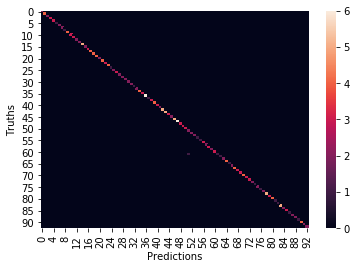

In [13]:
# Generating Confusion matrix
testSetResults = src.Dispatcher.runTestSet(**sortedClassifiersBestFScore['SVM']['pipeline'])
predictions = testSetResults['predictions']
truths = testSetResults['truths']
sns.heatmap(confusion_matrix(truths,predictions))
plt.xlabel('Predictions')
plt.ylabel('Truths')
plt.show()

We get a very distinct straight diagonal, indicating we have good results. 

## Average results from preprocessing combination

Our team is curious to see if preprocessing differently changed anything in the performance. We will verify below.

In [14]:
def pprintPreprocessing(cmds):
    return "&".join([cmd['method'] for cmd in cmds])
preprocessCombinations = set(map(lambda x: pprintPreprocessing(results[x]['pipeline']['DataManagementParams']['cmds']), results))

#Attach all results to their preprocessing combination
preprocess = {combination:[] for combination in preprocessCombinations}
for trial in results:
    preprocess[pprintPreprocessing(results[trial]['pipeline']['DataManagementParams']['cmds'])].append(results[trial]['results'])
    
#Calculate average of metrics for every preprocess combination
preprocessAvg = {}
for combination in preprocessCombinations:
    avgDict = {}
    for metric in preprocess[combination][0].keys():
        avgDict[metric] = sum(float(d[metric]) for d in preprocess[combination]) / len(preprocess[combination])
    preprocessAvg[combination] = avgDict

In [57]:
def sortPreProcessingByMetric(metric):
    preprocessingSorted = sorted(preprocessAvg, key = lambda x: preprocessAvg[x][metric], reverse = True)
    out = pd.DataFrame([],columns = [metric], index = preprocessingSorted)
    for combination in preprocessingSorted:
        out.loc[combination] = preprocessAvg[combination][metric]
    print(out)

In [58]:
sortPreProcessingByMetric('Accuracy')

                                  Accuracy
StandardScaler&PCA                0.622504
StandardScaler&FeatureExtraction  0.580994
Normalize&PCA                     0.541276
Normalize&FeatureExtraction       0.475998


In [59]:
sortPreProcessingByMetric('Precision')

                                 Precision
StandardScaler&PCA                0.628602
StandardScaler&FeatureExtraction  0.586091
Normalize&PCA                     0.543732
Normalize&FeatureExtraction       0.478225


In [60]:
sortPreProcessingByMetric('Recall')

                                    Recall
StandardScaler&PCA                0.614092
StandardScaler&FeatureExtraction  0.571288
Normalize&PCA                     0.53171 
Normalize&FeatureExtraction       0.466512


In [61]:
sortPreProcessingByMetric('FScore')

                                    FScore
StandardScaler&PCA                0.619947
StandardScaler&FeatureExtraction  0.577322
Normalize&PCA                     0.53648 
Normalize&FeatureExtraction       0.470953


The StandardScaler & PCA (with num_components = 100) seems to be the best combination of preprocessing out of the 4 combinations.